<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionales1/blob/main/Semana14/MC_Minimize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive
import scipy.optimize as spo

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
os.chdir("/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI")
!ls

Parcial2    Semana1   Semana11	Semana13  Semana2  Semana4  Semana6  Semana8
ProyectoML  Semana10  Semana12	Semana14  Semana3  Semana5  Semana7  Semana9


In [9]:
file = '/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana14/Data/DataExponencial.csv'
#file = '/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana14/Data/DataExponencial1.csv'

file

'/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana14/Data/DataExponencial.csv'

In [10]:
data = pd.read_csv(file)
x = data['x']
y = data['y']
sigma = data['sigma']
N = x.shape[0]

<ErrorbarContainer object of 3 artists>

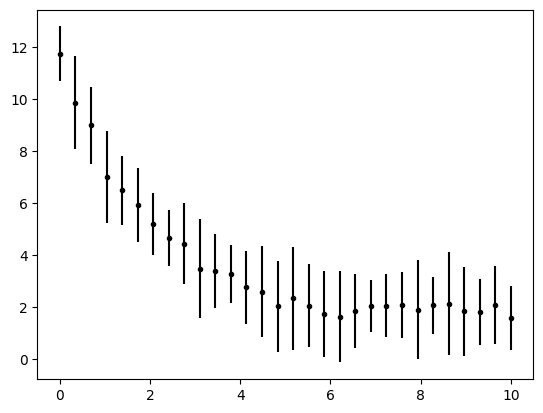

In [11]:
plt.errorbar(x,y,yerr=sigma,fmt='.',color='k')

In [12]:
# Definimos el modelo con sus parametros
def GetModel1(x,p):
    y = 0.
    for n in range(len(p)):
        y += p[n]*x**n
    return y

In [13]:
def GetModel2(x,p):
    A,B,C = p
   # C  = 0.
    return A*np.exp(B*x)+C

In [14]:
def Chi2(p,x,y,sigma,Model):
    return np.sum( ( 0.5*( y - Model(x,p) )/sigma )**2  + 0.5*np.log(2*np.pi*sigma) )

In [15]:
#primer modelo
p0 = np.ones(3)
nll = lambda *p: Chi2(*p)

In [16]:
result = spo.minimize( nll, p0, args=(x,y,sigma,GetModel1), options={"disp":True}, method='Nelder-Mead')

Optimization terminated successfully.
         Current function value: 34.792388
         Iterations: 193
         Function evaluations: 343


In [17]:
if result.success:
    print('Success!')
    print(f"x={result.x} y = {result.fun}")
else:
    print('could not find a minimum')
    print(f"x={result.x} y = {result.fun}")

Success!
x=[10.33489468 -2.50318469  0.17483038] y = 34.79238753573686


In [18]:
param = result.x

In [19]:
ObsChi2 = Chi2(param,x,y,sigma,GetModel1)
ObsChi2

np.float64(34.79238753573686)

In [20]:
def Chi2Reducido(p,Model):
    return Chi2(p,x,y,sigma,Model)/(N-len(p))

In [21]:
Chi2R = Chi2Reducido(param,GetModel1)
Chi2R

np.float64(1.2886069457680318)

In [22]:
#segundo modelo
p0 = np.ones(3)
nll = lambda *p: Chi2(*p)
result1 = spo.minimize( nll, p0, args=(x,y,sigma,GetModel2), options={"disp":True})

Optimization terminated successfully.
         Current function value: 33.423904
         Iterations: 47
         Function evaluations: 196
         Gradient evaluations: 49


In [23]:
param1 = result1.x
ObsChi2 = Chi2(param1,x,y,sigma,GetModel2)
ObsChi2

np.float64(33.42390435426751)

In [24]:
Chi2RE = Chi2Reducido(param1,GetModel2)
Chi2RE

np.float64(1.2379223834913893)

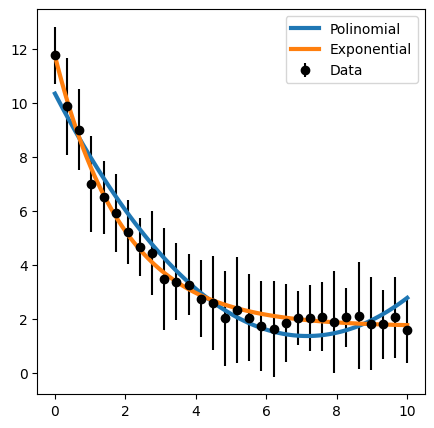

In [25]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.errorbar(x,y,yerr=sigma,fmt='o',color='k',label='Data')

t = np.linspace(np.min(x),np.max(x),100)
ax.plot(t,GetModel1(t,param),lw=3,label='Polinomial')
ax.plot(t,GetModel2(t,param1),lw=3,label='Exponential')
ax.legend()

In [26]:
residuos1 = GetModel1(x,param ) - y
residuos2 = GetModel2(x,param1) - y

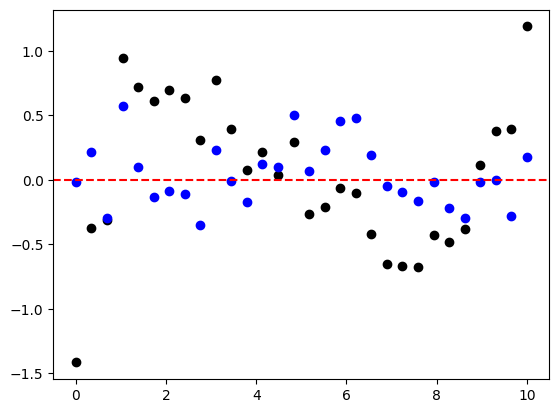

In [27]:
plt.scatter(x,residuos1,color='k')
plt.scatter(x,residuos2,color='b')
plt.axhline(y=0.,ls='--',color='r')

In [28]:
positive = residuos1[residuos1 >  0.].shape[0]
negative = residuos1[residuos1 <= 0.].shape[0]
print(positive/N,negative/N)

0.5333333333333333 0.4666666666666667


In [29]:
positive = residuos2[residuos2 >  0.].shape[0]
negative = residuos2[residuos2 <= 0.].shape[0]
print(positive/N,negative/N)

0.43333333333333335 0.5666666666666667
